In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.signal as signal
from simsimpy import *
mpl.rcParams['mathtext.default'] = 'regular'

c:\Users\claes\miniconda3\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\claes\miniconda3\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


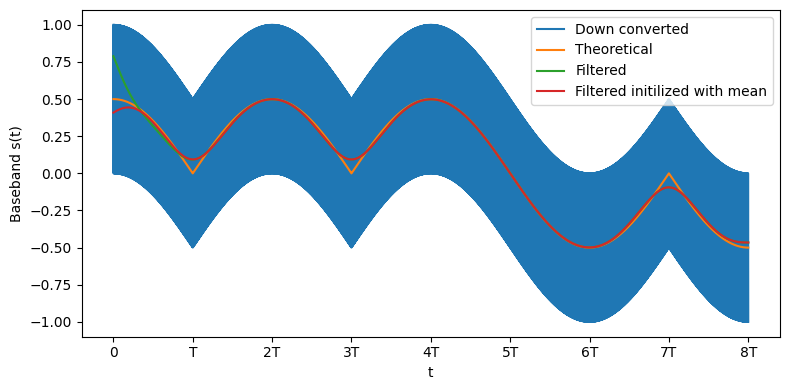

In [16]:
# nice plot
T = 1/200
fc = 20e3
fs = 4e6
L0 = 8

msk_data, t, data, phase = generate_msk(L0, 0.5, T, fc, fs)
s_down = msk_data * np.exp(-1j*2*np.pi*fc*t)
sos = signal.butter(2, 1/T, 'low', fs=fs, output='sos')
s_filtered = signal.sosfiltfilt(sos, s_down)
temp = np.append(np.ones(int(fs*T))*np.mean(s_down[0:int(fs*T)]), s_down)
s_filtered1 = signal.sosfiltfilt(sos, temp)[int(fs*T):]

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(t/T, s_down, label='Down converted')
ax.plot(t/T, 1/2*np.exp(1j*phase), label='Theoretical')
ax.plot(t/T, s_filtered, label='Filtered')
ax.plot(t/T, s_filtered1, label='Filtered initilized with mean')
ax.legend(loc = 'upper right')
tick_labels = ['0', 'T', '2T', '3T', '4T', '5T', '6T', '7T', '8T']
ax.set_xlabel('t')
ax.set_xticks(np.arange(0, 9, 1))
ax.set_xticklabels(tick_labels)
ax.set_ylabel('Baseband s(t)')
plt.tight_layout()
plt.savefig('figures/analysis/filtered_msk.pdf')




c:\Users\claes\miniconda3\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\claes\miniconda3\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


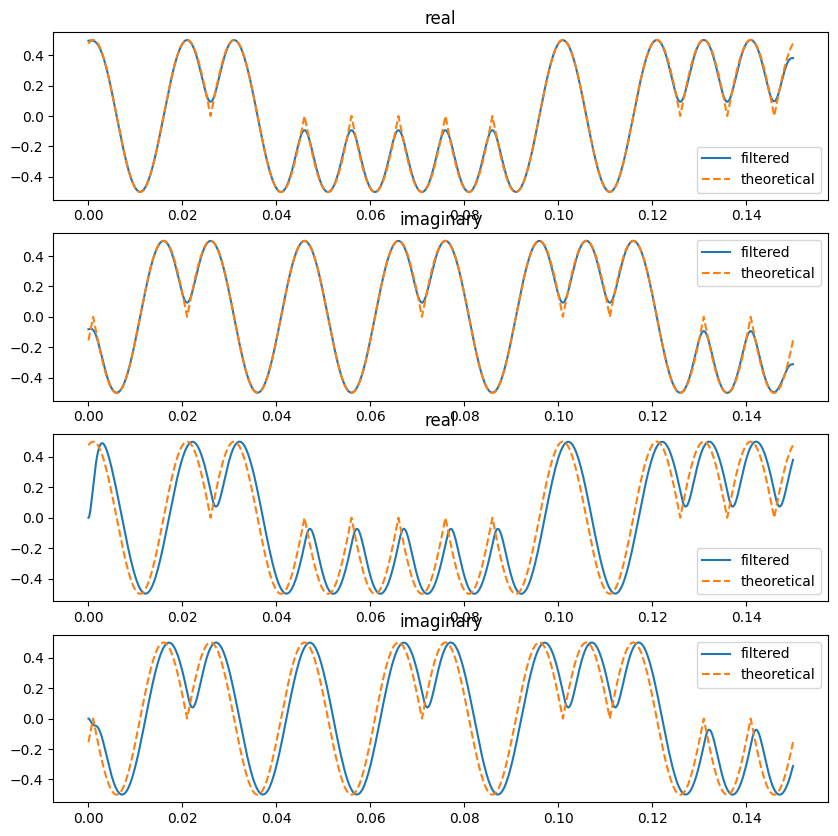

In [55]:
T = 1/200
fc = 15e3
fs = 4e6
N = 30

msk_data, t, data, phase = generate_msk(N, 0.5, T, fc, fs, offset=0.2*T)

# downconvert
msk_data_down = msk_data*np.exp(-1j*2*np.pi*fc*t)

# lowpass filter
sos = signal.butter(2,0.0001, 'low', output='sos')
b, a = signal.butter(2, 0.0001, 'low',output='ba', analog=False)
w, h = signal.sosfreqz(sos, fs=fs)
test = np.append(np.ones(10000)*np.mean(msk_data_down[0:10000]),msk_data_down)
#msk_data_down_filtered = signal.sosfiltfilt(sos, msk_data_down) # filter the signal
msk_data_down_filtered = signal.sosfiltfilt(sos, test)
msk_data_down_filtered = msk_data_down_filtered[10000:] # remove the first 10000 samples

t_impulse, y_impulse = signal.dimpulse((b,a,1/fs), n=100)
t_impulse, y_impulse = signal.impulse((b,a))

# plot
fig, ax = plt.subplots(4,1, figsize=(10,10))

ax[0].plot(t, msk_data_down_filtered,label = 'filtered')
ax[0].plot(t, 1/2*np.exp(1j*phase), label = 'theoretical', ls = '--')
ax[0].set_title('real')
ax[0].legend()


ax[1].plot(t, msk_data_down_filtered.imag, label = 'filtered')
ax[1].plot(t, 1/2*np.exp(1j*phase).imag, label = 'theoretical', ls = '--')
ax[1].set_title('imaginary') 
ax[1].legend()

msk_data_down_filtered1 = signal.sosfilt(sos, msk_data_down)

ax[2].plot(t, msk_data_down_filtered1,label = 'filtered')
ax[2].plot(t, 1/2*np.exp(1j*phase), label = 'theoretical', ls = '--')
ax[2].set_title('real')
ax[2].legend()


ax[3].plot(t, msk_data_down_filtered1.imag, label = 'filtered')
ax[3].plot(t, 1/2*np.exp(1j*phase).imag, label = 'theoretical', ls = '--')
ax[3].set_title('imaginary') 
ax[3].legend()